### 텍스트 분석(Text	Mining)의 종류 (NLP, Natural Language Processing에 기반)
1. 정보 추출 (Information Retrieval): 문서내의 정형 데이터를 추출하는 작업
1. 문서 분류 (Text Classification): 문서들을 특정 분류 체계에 따라 분류하는 작업
1. 감성 분석 (Sentiment Analysis): 문서에 내포되어 있는 감정과 의견을 추출하는 작업

#### 텍스트 정규화 (Text Normalization)
텍스트의 형태를 일관되게 변형하는 작업
 - 토큰화 (Tokenization): 텍스트를 의미 단위(토큰)로 분학하는 작업
    - Type: 단어 요소, 어간 // Token: 텍스트 내부의 원소

 - 어간 추출 (Stemming): 형태가 변형된 단어로부터 어간을 분리하는 작업
 - 표제어 추출(Lemmatization): 문장 속에서 다양한 형태로 변형된 단어의 표제어(lemma, 단어의 의미를 사전에서 찾을 때 사용하는 기본형)를 찾는 작업. 단순한 어근이 아닌, 문장 구조상 단어의 의미를 이해한 후 기본형 추출

#### 형태소 분석 (POS-Tagging): 토큰의 형태소를 파악하는 작업
 - POS-Tagging (Part-Of-Speech Tagging): 토큰의 품사 정보를 추출하는 작업. open class와 closed class(상대적으로 고정되어 있는 셋. 전치사: of, in, at, 조동사: may, have, can, will, must, 대명사: I, you, she, mine, their 등 주로 문장 내에서 문법적인 역학을 하는 단어)

■ 영어 형태소 분석기
Stanford POS-Tagger, NLTK POS-Tagger
■ 한국어 형태소 분석기
Hannanum, Kkma, Komoran, Twitter

### 1. 정보 추출 (Information Retrieval, IR)
구조화 되지 않은 문서 군집 내에서 필요한 정보를 포함하고 있는 문서를 찾아내는 작업

- 문서 단어 행렬 (document term matrix): 각 단어가 각 문서에 등장하는지의 유무를 표현하는 행렬|

- Bag of Words 모델: 문서 내에 등장하는 단어들의 순서를 무시함

Term Frequency (TF)
- 단어 빈도 tft,d는 특정 단어 t가 특정 문서 d 내에 등장하는 빈도
- 특정단어가 10번 등장하는(tf=10) 문서가 1번 등장하는(tf=1) 문서보다 더 많이 타당하 다고 볼 수 없음
- 문서의 관련도, 타당성은 term frequency와 비례하게 증가하지 않음
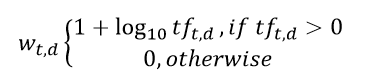

Inverse Document Frequency (IDF)
- dft는 document frequency로 단어 t가 등장한 문서의 수
- dft는 단어 t의 중요도의 역수와 같음
- 단어 t의 idf 수치 idft는 t의 단어의 중요도를 나타내는 척도
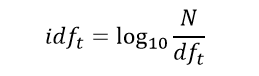

TF-IDF (Term Frequency – Inverse Document Frequency)는 TF와 IDF의 곱
- 문서군 내에서 특정 단어의 중요도를 수치화한 값
- tf-idf 값은 특정 문서 내 특정 단어의 빈도(tf)가 높아질 수록 커짐
- tf-idf 값은 문서군 내에서 단어가 희박하게 등장학 수록(idf) 커짐
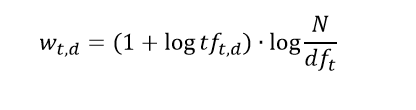

# 실습: 텍스트 분류
- 전처리 (Pre-Processing)
  - 토큰화: 텍스트를 의미 단위로 분학하는 작업
  - 정제: 무의미한 토큰을 제거하는 작업
  - 형태소 분석: 토큰의 형태소를 파악하는 작업

- 속성 추출
  - 의미 단위가 가지는 수치정보, 가중치

- 분류 모델 생성
  - 기계학습 알고리즘 사용한 텍스트 분류 모델 학습

- 분류 결과 추출 및 분류기 성능 평가
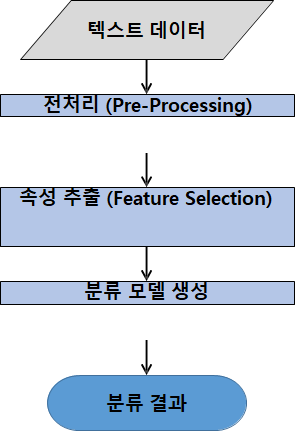

- 문서 벡터화를 질의(query)에 적용하기: 문서들을 tf-idf값으로 이루어진 벡터로 변형, 문서들을 유사도(similarity = 거리 proximity)에 따라 정렬, 벡터간 거리 Euclidean distance를 사용하면 서로 다른 크기의 벡터를 가진 문서들에 적용 하기 어려움, 벡터간 각도를 사용하면 한 직선 상의 문서들은 거리가 다름에도 불구하고 각도가 0인 문제 발생, 위의 문제점들을 극복하고 문서 간의 유사도를 구하기 위해 정규화 벡터의 cosine 유사도를 사용
- 문서간 유사도(similarity) 측정: tf-idf

In [1]:
import http.client, urllib, request, urllib.parse, urllib.error, base64
import json
import pandas as pd
import numpy as np

- http.client는 데이터를 요청하는 client의 http 프로토콜을 관리하는 패키지 Urllib.request는 url을 열고 데이터를 읽어 들이는 패키지
- Urllib.parse 는 url을 통해 읽어온 데이터를 문법적으로 분석
- Urllib.error 는 request에서 발생하는 오류 처리
- Base64는 읽어온 이진 형태의 데이터를 ASCII 형태로 변환
- Json은 json 스트링이나 파일을 파싱하는 패키지

In [117]:
df = pd.DataFrame(columns = ('name', 'description', 'category'))

In [118]:
#headers = {'Ocp-Apim-Subscription-Key': '0807efa2e62f4846b85a94ceca833b89'}

In [155]:
params = urllib.parse.urlencode({
    'Category':'World',
    'Market':'en-GB',
    'Count':100
})

뉴스 데이터 요청
- try 문에서 일련의 작업을 시도
- http 프로토콜을 사용해 테이터를 요청하는 http.clien의 모듈 중 HTTPSConnection을 사용해 지 정된 url과 연결
- 연결 요청 정보를 url 뒤 변수로 선언하고, request 함수를 사용해 데이터를 요청
  “GET” : url에 요청 정보가 문자 그대로 보이는 형태로 데이터를 요청하는 방식
  “/bing/v5.0/news/?%s” : url 뒤에 연결되는 문자열로, ? 뒤에 요청 정보 입력 앞에서 설정한 params와 headers   포함시킴
  bing 뉴스 수집에서 body 정보는 따로 필요하지 않음
- Getresponse를 사용해 뉴스 데이터를 받아 변수 reponse에 저장
- Response에 저장된 데이터는 HTTPResponse 객체 형식이므로 read 함수를 사용해 읽어 변수 data에 저장
- Data 출력
- 연결 종료
- Try 문 내에서 시도한 작업을 실패학 경우 except 문을 사용해 예외처리
- 작업 실패 시 오류 메시지 출력
  format 함수를 사용해 첫 번째 문자열 {0}에는 e.errno, 오류 번호가 출력
  두 번째 문자열 {1}에는 e.strerror, 오류 내용이 출력

In [156]:
try:
    conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
    conn.request("GET", "/bing/v7.0/news/?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b'{"_type": "News", "webSearchUrl": "https:\\/\\/www.bing.com\\/news\\/search?q=&nvaug=%5bNewsVertical+CategoryBrowseRequest%3d%221%22+Category%3d%22rt_UK%22+EnableCategoryPagination%3d%221%22+ResultsPerPage%3d%22100%22%5d&form=TNSA02", "value": [{"name": "News Daily: PM in Scotland to \'renew ties\' and business \'not ready for no deal\'", "url": "https:\\/\\/www.bbc.co.uk\\/news\\/uk-49144807", "image": {"thumbnail": {"contentUrl": "https:\\/\\/www.bing.com\\/th?id=ON.BDE83DE2CBA521B0EFDFA93213A26AA6&pid=News", "width": 700, "height": 393}}, "description": "Boris Johnson wants renewal of \'ties that bind UK\' Parliament might be in recess, but Boris Johnson\'s breathless start to life as prime minister continues with a visit to Scotland. He\'s announcing \xc2\xa3300m in funding to help communities in Falkirk, the ...", "provider": [{"_type": "Organization", "name": "BBC", "image": {"thumbnail": {"contentUrl": "https:\\/\\/www.bing.com\\/th?id=AR_b639c1691c4fa767d85fd87b7042f9e6&pid=n

In [157]:
data = data.decode('utf-8')

변수에 저장된 byte 형태 정보 가공
- 변수 data에 저장된 뉴스 데이터를 utf-8형태로 변환
- Data의 뉴스 데이터를 json 형태로 다시 변환
- Obj의 정보 중 뉴스에 대한 내용을 포함하고 있는 value 값들을 변수 val에 저장
- val의 key값들 출력

In [158]:
obj = json.loads(data)
val = obj['value']
val[0].keys()

dict_keys(['name', 'url', 'image', 'description', 'provider', 'datePublished', 'category'])

가공된 뉴스 데이터를 데이터프레임에 입력
- 데이터 프레임의 길이를 변수 l에 저장
- for문을 사용해 데이터 프레임 df에 정보 입력, range 함수를 사용해 0부터 뉴스 val의 개수만큼 작업 수행
- loc 함수를 사용해 데이터프레임에 인덱스를 지정해 데이터 입력 i번째 뉴스의 제목, 내용, 카테고리를 순서대로 입력
- 데이터프레임 df 출력해 확인

In [159]:
l = len(df)
for i in range(0, len(val)):
    df.loc[l+i] = [val[i]['name'], val[i]['description'], val[i]['category']]

In [223]:
df

,name,description,category
0,Scotland's largest offshore wind farm to be op...,Scotland's largest offshore wind farm is to be...,Business
1,Bank of England out of step with central banks...,The Bank of England is poised to become the ou...,Business
2,Boom in business current account switching: wh...,Business bank account switching is growing in ...,Business
3,"Dollar near two-month top after U.S. GDP, poun...",TOKYO (Reuters) - The dollar clung to a two-mo...,Business
4,Brexit: What would no deal mean for Ireland?,The Irish government has been clear that a no-...,Business
5,Primark takes on landlords in push for rent cuts,Primark is pushing for rent cuts in a bid to b...,Business
6,"Asian shares ease into trade talks, Fed test",SYDNEY (Reuters) - Asian shares slipped on Mon...,Business
7,It's two months since Neil Woodford shut his f...,Tomorrow marks eight long weeks since investme...,Business
8,Sberbank/Mail.ru hook-up reveals unhappy Yande...,When the Russian banking giant Sberbank launch...,Business
9,Ryanair profits crash 21% as airline counts co...,Ryanair's profits collapsed 21% fall in profit...,Business


데이터를 요청하기 위해 입력한 params의 category 값을 변경해 수집을 반복

In [182]:
np.random.permutation(20)

array([15, 18, 14,  2, 19, 10,  4, 16,  1, 12, 17,  6,  0, 13,  5,  8,  3,
        9, 11,  7])

In [181]:
np.random.permutation(10)

array([3, 7, 6, 4, 8, 1, 9, 0, 2, 5])

In [183]:
df_sh = df.iloc[np.random.permutation(len(df))]
df_sh.to_csv('bing_news_shuffle_0517.csv')

카테고리들에 대한 수집을 완료한 후 카테고리가 골고루 분포하도록 랜덤으로 섞어 저장
- np.random.permutation 함수를 사용해 0부터 (df의 길이 -1)까지의 숫자를 random으로 반
  환하고 iloc 함수를 사용해 랜덤으로 주어진 인덱스에 해당하는 데이터프레임 df의 데이터를 새로운 데이터 프레임   df_sh에 저장
- 랜덤으로 섞인 뉴스 데이터가 저장된 df_sh를 csv 파일로 저장

In [2]:
df = pd.read_csv('./bing_news_shuffle_0517.csv')

■ 데이터 전처리
- 데이터 전처리는 기계학습 알고리즘에 데이터를 효과적으로 적용하기 위해 필요한 중요한
작업
- 데이터의 특정 속성이 없거나 정보가 누락되어 있는 불완전한 데이터를 필터링
- 데이터에 포함된 잘못된 값이나 이상값과 같은 노이즈 제거
- 데이터에 충돌하는 값, 불일치하는 값을 제거

■ 텍스트 데이터 전처리
- 토큰화 (Tokenize): 텍스트를 단어나 구와 같은 의미 단위로 분학하는 작업
- 정제 (Cleaning): 텍스트에 포함된 무의미한 단어, 불용어를 제거하는 작업
- 형태소 분석(POS-Tagging): 토큰의 품사를 파악하는 작업

In [3]:
import nltk
#nltk.download()

In [4]:
print(df.iloc[0]['description'])

The Met Office has issued a weather warning for thunderstorms just days after a spell of "crazy" lightning in Bath and the wider Somerset area. Dramatic thunderstorms and spectacular lightning struck the county in the early hours of Wednesday morning (July ...


In [5]:
tokens = nltk.word_tokenize(df.iloc[0]['description'])
tokens

['The',
 'Met',
 'Office',
 'has',
 'issued',
 'a',
 'weather',
 'warning',
 'for',
 'thunderstorms',
 'just',
 'days',
 'after',
 'a',
 'spell',
 'of',
 '``',
 'crazy',
 "''",
 'lightning',
 'in',
 'Bath',
 'and',
 'the',
 'wider',
 'Somerset',
 'area',
 '.',
 'Dramatic',
 'thunderstorms',
 'and',
 'spectacular',
 'lightning',
 'struck',
 'the',
 'county',
 'in',
 'the',
 'early',
 'hours',
 'of',
 'Wednesday',
 'morning',
 '(',
 'July',
 '...']

In [6]:
tokens = [token.lower() for token in tokens if len(token) > 1]
tokens

['the',
 'met',
 'office',
 'has',
 'issued',
 'weather',
 'warning',
 'for',
 'thunderstorms',
 'just',
 'days',
 'after',
 'spell',
 'of',
 '``',
 'crazy',
 "''",
 'lightning',
 'in',
 'bath',
 'and',
 'the',
 'wider',
 'somerset',
 'area',
 'dramatic',
 'thunderstorms',
 'and',
 'spectacular',
 'lightning',
 'struck',
 'the',
 'county',
 'in',
 'the',
 'early',
 'hours',
 'of',
 'wednesday',
 'morning',
 'july',
 '...']

In [7]:
tokens_bigram = nltk.bigrams(tokens)
for token in tokens_bigram:
    print(token)

('the', 'met')
('met', 'office')
('office', 'has')
('has', 'issued')
('issued', 'weather')
('weather', 'warning')
('warning', 'for')
('for', 'thunderstorms')
('thunderstorms', 'just')
('just', 'days')
('days', 'after')
('after', 'spell')
('spell', 'of')
('of', '``')
('``', 'crazy')
('crazy', "''")
("''", 'lightning')
('lightning', 'in')
('in', 'bath')
('bath', 'and')
('and', 'the')
('the', 'wider')
('wider', 'somerset')
('somerset', 'area')
('area', 'dramatic')
('dramatic', 'thunderstorms')
('thunderstorms', 'and')
('and', 'spectacular')
('spectacular', 'lightning')
('lightning', 'struck')
('struck', 'the')
('the', 'county')
('county', 'in')
('in', 'the')
('the', 'early')
('early', 'hours')
('hours', 'of')
('of', 'wednesday')
('wednesday', 'morning')
('morning', 'july')
('july', '...')


In [8]:
token_trigram = nltk.trigrams(tokens)
for token in token_trigram:
    print(token)

('the', 'met', 'office')
('met', 'office', 'has')
('office', 'has', 'issued')
('has', 'issued', 'weather')
('issued', 'weather', 'warning')
('weather', 'warning', 'for')
('warning', 'for', 'thunderstorms')
('for', 'thunderstorms', 'just')
('thunderstorms', 'just', 'days')
('just', 'days', 'after')
('days', 'after', 'spell')
('after', 'spell', 'of')
('spell', 'of', '``')
('of', '``', 'crazy')
('``', 'crazy', "''")
('crazy', "''", 'lightning')
("''", 'lightning', 'in')
('lightning', 'in', 'bath')
('in', 'bath', 'and')
('bath', 'and', 'the')
('and', 'the', 'wider')
('the', 'wider', 'somerset')
('wider', 'somerset', 'area')
('somerset', 'area', 'dramatic')
('area', 'dramatic', 'thunderstorms')
('dramatic', 'thunderstorms', 'and')
('thunderstorms', 'and', 'spectacular')
('and', 'spectacular', 'lightning')
('spectacular', 'lightning', 'struck')
('lightning', 'struck', 'the')
('struck', 'the', 'county')
('the', 'county', 'in')
('county', 'in', 'the')
('in', 'the', 'early')
('the', 'early', 'h

In [9]:
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
tokens_clean = [token for token in tokens if not token in stop_words]
tokens_clean

['met',
 'office',
 'issued',
 'weather',
 'warning',
 'thunderstorms',
 'days',
 'spell',
 '``',
 'crazy',
 "''",
 'lightning',
 'bath',
 'wider',
 'somerset',
 'area',
 'dramatic',
 'thunderstorms',
 'spectacular',
 'lightning',
 'struck',
 'county',
 'early',
 'hours',
 'wednesday',
 'morning',
 'july',
 '...']

In [12]:
tokens_tagged = nltk.pos_tag(tokens_clean)
print(tokens_tagged)

[('met', 'VBN'), ('office', 'NN'), ('issued', 'VBD'), ('weather', 'RBR'), ('warning', 'VBG'), ('thunderstorms', 'NNS'), ('days', 'NNS'), ('spell', 'VBP'), ('``', '``'), ('crazy', 'JJ'), ("''", "''"), ('lightning', 'VBG'), ('bath', 'NN'), ('wider', 'NN'), ('somerset', 'VBD'), ('area', 'NN'), ('dramatic', 'JJ'), ('thunderstorms', 'NNS'), ('spectacular', 'JJ'), ('lightning', 'VBG'), ('struck', 'JJ'), ('county', 'NN'), ('early', 'JJ'), ('hours', 'NNS'), ('wednesday', 'JJ'), ('morning', 'NN'), ('july', 'NN'), ('...', ':')]


In [13]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [14]:
tokens_noun = [word for word, pos in tokens_tagged if pos in ['NN', 'NNP']]
print(tokens_noun)

['office', 'bath', 'wider', 'area', 'county', 'morning', 'july']


### Word Cloud

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [16]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'white', max_font_size=100, max_words=50, stopwords=stopwords)

데이터 준비 및 적용

- 뉴스 내용인 description 부분을 str 함수를 사용해 string 형태로 변환하고
  cat 함수를 사용해 문자열들을 한 문자열로 연결
  sep=", "를 사용해 각 문자열을 연결학 때 구분자로 콤마를 지정 한 문자열로 합쳐진 뉴스 내용을 text_data에 저   장
- generate 함수를 사용해 문자열 text_data에 대해 word cloud를 그려 변수 wordcloud에 저장

In [17]:
text_data = df['description'].str.cat(sep=', ')
wordcloud = wc.generate(text_data)

(-0.5, 399.5, 199.5, -0.5)

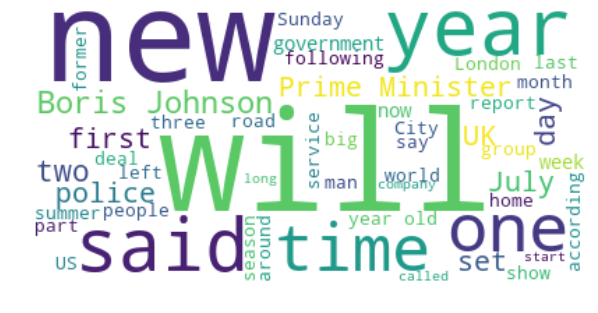

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') # bi linear 픽셀 중앙값들로 연결 -> 테두리 매끈하게
plt.axis('off')

### 특징값 추출. document term matrix 문서 단어 행렬 (TF-IDF)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

- Scikit learn에서 제공하는 TfidfVectorizer 모듈을 사용해 텍스트 데이터의 TF-IDF 값으로 문서 단 어 행렬을 구성
---------------------------------------
- 텍스트 데이터를 astype 함수를 사용해 문자열로, tolist 함수를 사용해 리스트로 변환 후 text_data_list 변수에 저장
- Numpy의 array 함수와 for문을 사용해 배열로 변환 후 text_data_arr에 저장

In [20]:
text_data_list = df['description'].astype(str).tolist()
text_data_arr = np.array([text for text in text_data_list])

- TfidfVectorizer 함수를 사용해 tf-idf 문서 단어 행렬을 만드는 모듈 vectorizer 선언 Min_df=2 : 단어 최소 등장 빈도로 2번 이상 등장하는 단어들을 대상으로 함 
   Ngram_range : 단어 추출 단위로 (1,2)는 unigram과 bigram 추출, 1<= n <= 2
  Strip_accents="Unicode" : accents(억양표시)를 제거하며 unicode에 해당하는 모든 문자에 적용 가능
  Norm="l2" : pearson 함수를 사용해 normalization 진행
- 문서단어행렬을 만드는 모듈 vectorizer의 Fit_transform 함수를 사용해 배열에 저장된 데이터의 문서단어행렬을 구하고 matrix 형식 변수 text_data에 저장

In [21]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2), strip_accents='unicode', norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

- 문서 단어 행렬을 입력한 데이터 프레임 df_tfidf
  - 행 : 문서 번호
  - 열 : token

In [22]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf

,000,10,10 000,10 days,10 years,100,11,12,12 others,13,...,you need,you re,young,young man,your,yourself,youth,zaha,zanu,zanu pf
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.160861,0.0,0.0,0.000000,0.174833,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.364013,0.0,0.0,0.334923,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [24]:
description = df['description'].astype(str).tolist()
category = df['category'].astype(str).tolist()

In [25]:
trainset_size = int(round(len(description)*0.80))
trainset_size

526

- 데이터 셋의 80%는 training set으로, 나머지 20%는 test set으로 구성
- 기계학습 알고리즘에 적용하기 위해서 np.array 함수를 사용해 배열로 변형
  뉴스 내용 description의 training set 범위 내 내용 data를 join 함수를 사용해 연결하고 x_train에
  저장
- 뉴스 카테고리 category 데이터를 y_train에 저장


In [26]:
x_train = np.array([data for data in description[0:trainset_size]])
y_train = np.array([data for data in category[0:trainset_size]])

x_test = np.array([data for data in description[trainset_size+1:len(description)]])
y_test = np.array([data for data in category[trainset_size+1:len(category)]])

In [27]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [31]:
y_test

array(['UK', 'Business', 'World', 'Sports', 'ScienceAndTechnology',
       'World', 'Sports', 'Entertainment', 'ScienceAndTechnology',
       'Sports', 'World', 'Sports', 'Politics', 'Politics', 'World',
       'Business', 'Business', 'ScienceAndTechnology', 'Politics', 'UK',
       'ScienceAndTechnology', 'Business', 'UK', 'World', 'World',
       'ScienceAndTechnology', 'Sports', 'Business', 'Entertainment',
       'Sports', 'Business', 'UK', 'ScienceAndTechnology', 'Sports',
       'ScienceAndTechnology', 'Politics', 'World', 'UK',
       'ScienceAndTechnology', 'World', 'Entertainment', 'World', 'UK',
       'ScienceAndTechnology', 'World', 'World', 'ScienceAndTechnology',
       'UK', 'Business', 'World', 'Sports', 'Sports', 'Entertainment',
       'Entertainment', 'World', 'Business', 'UK', 'Politics', 'Sports',
       'Sports', 'UK', 'Business', 'ScienceAndTechnology', 'World',
       'Politics', 'Business', 'Politics', 'Business', 'UK', 'World',
       'Politics', 'UK', 'Sports

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5, 7],
          'min_child_weight':[1, 3],
          'colsample_bytree':[0.5, 0.75, 1.0],
          'num_class': [8]}

gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_set=[(X_train, y_train), (X_test,y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-merror:0.505703	validation_1-merror:0.709924
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.404943	validation_1-merror:0.671756
[2]	validation_0-merror:0.347909	validation_1-merror:0.633588
[3]	validation_0-merror:0.321293	validation_1-merror:0.610687
[4]	validation_0-merror:0.302281	validation_1-merror:0.587786
[5]	validation_0-merror:0.28327	validation_1-merror:0.59542
[6]	validation_0-merror:0.264259	validation_1-merror:0.603053
[7]	validation_0-merror:0.260456	validation_1-merror:0.633588
[8]	validation_0-merror:0.258555	validation_1-merror:0.633588
[9]	validation_0-merror:0.254753	validation_1-merror:0.610687
[10]	validation_0-merror:0.243346	validation_1-merror:0.648855
[11]	validation_0-merror:0.249049	validation_1-merror:0.656489
[12]	validation_0-merror:0.245247	validation_1-merror:0.641221
[13]	validation_0-merror:0.237

[21]	validation_0-merror:0.249049	validation_1-merror:0.587786
[22]	validation_0-merror:0.247148	validation_1-merror:0.580153
[23]	validation_0-merror:0.243346	validation_1-merror:0.587786
[24]	validation_0-merror:0.237643	validation_1-merror:0.580153
[25]	validation_0-merror:0.237643	validation_1-merror:0.587786
[26]	validation_0-merror:0.23384	validation_1-merror:0.59542
[27]	validation_0-merror:0.228137	validation_1-merror:0.587786
[28]	validation_0-merror:0.228137	validation_1-merror:0.572519
[29]	validation_0-merror:0.214829	validation_1-merror:0.572519
[30]	validation_0-merror:0.211027	validation_1-merror:0.59542
[31]	validation_0-merror:0.212928	validation_1-merror:0.59542
[32]	validation_0-merror:0.212928	validation_1-merror:0.59542
[33]	validation_0-merror:0.211027	validation_1-merror:0.59542
[34]	validation_0-merror:0.212928	validation_1-merror:0.59542
[35]	validation_0-merror:0.211027	validation_1-merror:0.618321
[36]	validation_0-merror:0.209125	validation_1-merror:0.610687

[29]	validation_0-merror:0.258555	validation_1-merror:0.679389
[30]	validation_0-merror:0.256654	validation_1-merror:0.687023
[31]	validation_0-merror:0.256654	validation_1-merror:0.679389
[32]	validation_0-merror:0.249049	validation_1-merror:0.687023
[33]	validation_0-merror:0.252852	validation_1-merror:0.687023
[34]	validation_0-merror:0.252852	validation_1-merror:0.679389
[35]	validation_0-merror:0.249049	validation_1-merror:0.664122
[36]	validation_0-merror:0.249049	validation_1-merror:0.664122
[37]	validation_0-merror:0.241445	validation_1-merror:0.671756
[38]	validation_0-merror:0.243346	validation_1-merror:0.679389
[39]	validation_0-merror:0.239544	validation_1-merror:0.671756
[40]	validation_0-merror:0.23384	validation_1-merror:0.679389
[41]	validation_0-merror:0.235741	validation_1-merror:0.679389
[42]	validation_0-merror:0.231939	validation_1-merror:0.694656
[43]	validation_0-merror:0.231939	validation_1-merror:0.694656
[44]	validation_0-merror:0.231939	validation_1-merror:0.

[3]	validation_0-merror:0.28327	validation_1-merror:0.618321
[4]	validation_0-merror:0.268061	validation_1-merror:0.580153
[5]	validation_0-merror:0.249049	validation_1-merror:0.59542
[6]	validation_0-merror:0.241445	validation_1-merror:0.557252
[7]	validation_0-merror:0.228137	validation_1-merror:0.59542
[8]	validation_0-merror:0.228137	validation_1-merror:0.587786
[9]	validation_0-merror:0.228137	validation_1-merror:0.587786
[10]	validation_0-merror:0.212928	validation_1-merror:0.603053
[11]	validation_0-merror:0.212928	validation_1-merror:0.610687
[12]	validation_0-merror:0.209125	validation_1-merror:0.610687
[13]	validation_0-merror:0.203422	validation_1-merror:0.59542
[14]	validation_0-merror:0.203422	validation_1-merror:0.572519
[15]	validation_0-merror:0.201521	validation_1-merror:0.59542
[16]	validation_0-merror:0.201521	validation_1-merror:0.603053
[17]	validation_0-merror:0.201521	validation_1-merror:0.603053
[18]	validation_0-merror:0.205323	validation_1-merror:0.59542
[19]	

[11]	validation_0-merror:0.275665	validation_1-merror:0.694656
[12]	validation_0-merror:0.269962	validation_1-merror:0.687023
[13]	validation_0-merror:0.26616	validation_1-merror:0.70229
[14]	validation_0-merror:0.254753	validation_1-merror:0.679389
[15]	validation_0-merror:0.254753	validation_1-merror:0.709924
[16]	validation_0-merror:0.252852	validation_1-merror:0.709924
[17]	validation_0-merror:0.260456	validation_1-merror:0.709924
[18]	validation_0-merror:0.260456	validation_1-merror:0.687023
[19]	validation_0-merror:0.243346	validation_1-merror:0.694656
[20]	validation_0-merror:0.245247	validation_1-merror:0.70229
[21]	validation_0-merror:0.243346	validation_1-merror:0.694656
[22]	validation_0-merror:0.243346	validation_1-merror:0.70229
[23]	validation_0-merror:0.243346	validation_1-merror:0.717557
[24]	validation_0-merror:0.239544	validation_1-merror:0.70229
[25]	validation_0-merror:0.23384	validation_1-merror:0.694656
[26]	validation_0-merror:0.23384	validation_1-merror:0.70229


Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.374525	validation_1-merror:0.656489
[2]	validation_0-merror:0.34981	validation_1-merror:0.633588
[3]	validation_0-merror:0.325095	validation_1-merror:0.641221
[4]	validation_0-merror:0.321293	validation_1-merror:0.641221
[5]	validation_0-merror:0.304182	validation_1-merror:0.641221
[6]	validation_0-merror:0.296578	validation_1-merror:0.625954
[7]	validation_0-merror:0.294677	validation_1-merror:0.618321
[8]	validation_0-merror:0.294677	validation_1-merror:0.633588
[9]	validation_0-merror:0.28327	validation_1-merror:0.641221
[10]	validation_0-merror:0.277567	validation_1-merror:0.664122
[11]	validation_0-merror:0.258555	validation_1-merror:0.656489
[12]	validation_0-merror:0.260456	validation_1-merror:0.641221
[13]	validation_0-merror:0.260456	validation_1-merror:0.625954
[14]	validation_0-merror:0.256654	validation_1-merror:0.633588
[15]	validation_0-merror:0.247148	validation_1-merror:0.641221

[69]	validation_0-merror:0.21673	validation_1-merror:0.610687
[70]	validation_0-merror:0.21673	validation_1-merror:0.618321
[71]	validation_0-merror:0.21673	validation_1-merror:0.618321
[72]	validation_0-merror:0.21673	validation_1-merror:0.618321
[73]	validation_0-merror:0.21673	validation_1-merror:0.625954
[74]	validation_0-merror:0.21673	validation_1-merror:0.633588
[75]	validation_0-merror:0.218631	validation_1-merror:0.625954
[76]	validation_0-merror:0.21673	validation_1-merror:0.625954
[77]	validation_0-merror:0.218631	validation_1-merror:0.618321
[78]	validation_0-merror:0.218631	validation_1-merror:0.625954
[79]	validation_0-merror:0.218631	validation_1-merror:0.610687
Stopping. Best iteration:
[49]	validation_0-merror:0.212928	validation_1-merror:0.59542

[0]	validation_0-merror:0.43346	validation_1-merror:0.709924
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[

[20]	validation_0-merror:0.287072	validation_1-merror:0.687023
[21]	validation_0-merror:0.28327	validation_1-merror:0.694656
[22]	validation_0-merror:0.285171	validation_1-merror:0.687023
[23]	validation_0-merror:0.28327	validation_1-merror:0.694656
[24]	validation_0-merror:0.281369	validation_1-merror:0.694656
[25]	validation_0-merror:0.268061	validation_1-merror:0.687023
[26]	validation_0-merror:0.26616	validation_1-merror:0.687023
[27]	validation_0-merror:0.264259	validation_1-merror:0.679389
[28]	validation_0-merror:0.262357	validation_1-merror:0.694656
[29]	validation_0-merror:0.260456	validation_1-merror:0.671756
[30]	validation_0-merror:0.256654	validation_1-merror:0.671756
[31]	validation_0-merror:0.254753	validation_1-merror:0.648855
[32]	validation_0-merror:0.254753	validation_1-merror:0.648855
[33]	validation_0-merror:0.247148	validation_1-merror:0.664122
[34]	validation_0-merror:0.247148	validation_1-merror:0.656489
[35]	validation_0-merror:0.241445	validation_1-merror:0.65

[20]	validation_0-merror:0.212928	validation_1-merror:0.633588
[21]	validation_0-merror:0.21673	validation_1-merror:0.625954
[22]	validation_0-merror:0.21673	validation_1-merror:0.625954
[23]	validation_0-merror:0.218631	validation_1-merror:0.641221
[24]	validation_0-merror:0.218631	validation_1-merror:0.656489
[25]	validation_0-merror:0.220532	validation_1-merror:0.641221
[26]	validation_0-merror:0.220532	validation_1-merror:0.648855
[27]	validation_0-merror:0.220532	validation_1-merror:0.641221
[28]	validation_0-merror:0.220532	validation_1-merror:0.633588
[29]	validation_0-merror:0.218631	validation_1-merror:0.633588
[30]	validation_0-merror:0.218631	validation_1-merror:0.641221
[31]	validation_0-merror:0.21673	validation_1-merror:0.633588
[32]	validation_0-merror:0.214829	validation_1-merror:0.633588
Stopping. Best iteration:
[2]	validation_0-merror:0.298479	validation_1-merror:0.603053

[0]	validation_0-merror:0.410646	validation_1-merror:0.633588
Multiple eval metrics have been p

[17]	validation_0-merror:0.250951	validation_1-merror:0.664122
[18]	validation_0-merror:0.247148	validation_1-merror:0.664122
[19]	validation_0-merror:0.241445	validation_1-merror:0.664122
[20]	validation_0-merror:0.245247	validation_1-merror:0.656489
[21]	validation_0-merror:0.239544	validation_1-merror:0.671756
[22]	validation_0-merror:0.243346	validation_1-merror:0.671756
[23]	validation_0-merror:0.245247	validation_1-merror:0.656489
[24]	validation_0-merror:0.243346	validation_1-merror:0.656489
[25]	validation_0-merror:0.249049	validation_1-merror:0.671756
[26]	validation_0-merror:0.243346	validation_1-merror:0.671756
[27]	validation_0-merror:0.243346	validation_1-merror:0.687023
[28]	validation_0-merror:0.241445	validation_1-merror:0.679389
[29]	validation_0-merror:0.239544	validation_1-merror:0.70229
[30]	validation_0-merror:0.237643	validation_1-merror:0.70229
[31]	validation_0-merror:0.237643	validation_1-merror:0.694656
Stopping. Best iteration:
[1]	validation_0-merror:0.42775

[75]	validation_0-merror:0.201521	validation_1-merror:0.633588
[76]	validation_0-merror:0.205323	validation_1-merror:0.633588
[77]	validation_0-merror:0.205323	validation_1-merror:0.641221
[78]	validation_0-merror:0.211027	validation_1-merror:0.641221
[79]	validation_0-merror:0.209125	validation_1-merror:0.641221
[80]	validation_0-merror:0.209125	validation_1-merror:0.633588
[81]	validation_0-merror:0.207224	validation_1-merror:0.641221
[82]	validation_0-merror:0.214829	validation_1-merror:0.641221
[83]	validation_0-merror:0.214829	validation_1-merror:0.641221
[84]	validation_0-merror:0.209125	validation_1-merror:0.641221
[85]	validation_0-merror:0.207224	validation_1-merror:0.641221
Stopping. Best iteration:
[55]	validation_0-merror:0.209125	validation_1-merror:0.633588

[0]	validation_0-merror:0.425856	validation_1-merror:0.633588
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 

[48]	validation_0-merror:0.218631	validation_1-merror:0.572519
[49]	validation_0-merror:0.21673	validation_1-merror:0.564885
[50]	validation_0-merror:0.218631	validation_1-merror:0.580153
[51]	validation_0-merror:0.218631	validation_1-merror:0.580153
[52]	validation_0-merror:0.218631	validation_1-merror:0.580153
[53]	validation_0-merror:0.218631	validation_1-merror:0.587786
[54]	validation_0-merror:0.218631	validation_1-merror:0.580153
[55]	validation_0-merror:0.218631	validation_1-merror:0.587786
[56]	validation_0-merror:0.220532	validation_1-merror:0.59542
[57]	validation_0-merror:0.220532	validation_1-merror:0.59542
[58]	validation_0-merror:0.220532	validation_1-merror:0.603053
[59]	validation_0-merror:0.220532	validation_1-merror:0.572519
[60]	validation_0-merror:0.220532	validation_1-merror:0.603053
[61]	validation_0-merror:0.222433	validation_1-merror:0.603053
[62]	validation_0-merror:0.222433	validation_1-merror:0.59542
[63]	validation_0-merror:0.222433	validation_1-merror:0.595

[65]	validation_0-merror:0.222433	validation_1-merror:0.641221
[66]	validation_0-merror:0.224335	validation_1-merror:0.633588
[67]	validation_0-merror:0.224335	validation_1-merror:0.648855
[68]	validation_0-merror:0.224335	validation_1-merror:0.648855
[69]	validation_0-merror:0.224335	validation_1-merror:0.648855
[70]	validation_0-merror:0.224335	validation_1-merror:0.648855
[71]	validation_0-merror:0.224335	validation_1-merror:0.648855
[72]	validation_0-merror:0.224335	validation_1-merror:0.648855
[73]	validation_0-merror:0.226236	validation_1-merror:0.648855
[74]	validation_0-merror:0.224335	validation_1-merror:0.648855
[75]	validation_0-merror:0.224335	validation_1-merror:0.648855
[76]	validation_0-merror:0.222433	validation_1-merror:0.648855
[77]	validation_0-merror:0.222433	validation_1-merror:0.648855
[78]	validation_0-merror:0.224335	validation_1-merror:0.648855
[79]	validation_0-merror:0.222433	validation_1-merror:0.656489
Stopping. Best iteration:
[49]	validation_0-merror:0.24

[56]	validation_0-merror:0.239544	validation_1-merror:0.671756
[57]	validation_0-merror:0.235741	validation_1-merror:0.664122
[58]	validation_0-merror:0.241445	validation_1-merror:0.664122
[59]	validation_0-merror:0.241445	validation_1-merror:0.664122
[60]	validation_0-merror:0.235741	validation_1-merror:0.664122
[61]	validation_0-merror:0.237643	validation_1-merror:0.664122
[62]	validation_0-merror:0.23384	validation_1-merror:0.664122
[63]	validation_0-merror:0.235741	validation_1-merror:0.656489
Stopping. Best iteration:
[33]	validation_0-merror:0.273764	validation_1-merror:0.625954

[0]	validation_0-merror:0.359316	validation_1-merror:0.664122
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.313688	validation_1-merror:0.648855
[2]	validation_0-merror:0.296578	validation_1-merror:0.641221
[3]	validation_0-merror:0.277567	validation_1-merror:0.648

[40]	validation_0-merror:0.21673	validation_1-merror:0.618321
Stopping. Best iteration:
[10]	validation_0-merror:0.243346	validation_1-merror:0.610687

[0]	validation_0-merror:0.403042	validation_1-merror:0.709924
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.36692	validation_1-merror:0.732824
[2]	validation_0-merror:0.340304	validation_1-merror:0.679389
[3]	validation_0-merror:0.321293	validation_1-merror:0.671756
[4]	validation_0-merror:0.313688	validation_1-merror:0.648855
[5]	validation_0-merror:0.298479	validation_1-merror:0.648855
[6]	validation_0-merror:0.298479	validation_1-merror:0.633588
[7]	validation_0-merror:0.294677	validation_1-merror:0.618321
[8]	validation_0-merror:0.290875	validation_1-merror:0.610687
[9]	validation_0-merror:0.275665	validation_1-merror:0.618321
[10]	validation_0-merror:0.273764	validation_1-merror:0.610687
[11

[7]	validation_0-merror:0.326996	validation_1-merror:0.748092
[8]	validation_0-merror:0.311787	validation_1-merror:0.748092
[9]	validation_0-merror:0.302281	validation_1-merror:0.755725
[10]	validation_0-merror:0.288973	validation_1-merror:0.748092
[11]	validation_0-merror:0.292776	validation_1-merror:0.740458
[12]	validation_0-merror:0.279468	validation_1-merror:0.748092
[13]	validation_0-merror:0.264259	validation_1-merror:0.748092
[14]	validation_0-merror:0.264259	validation_1-merror:0.748092
[15]	validation_0-merror:0.258555	validation_1-merror:0.732824
[16]	validation_0-merror:0.258555	validation_1-merror:0.725191
[17]	validation_0-merror:0.258555	validation_1-merror:0.725191
[18]	validation_0-merror:0.256654	validation_1-merror:0.717557
[19]	validation_0-merror:0.256654	validation_1-merror:0.725191
[20]	validation_0-merror:0.252852	validation_1-merror:0.725191
[21]	validation_0-merror:0.254753	validation_1-merror:0.725191
[22]	validation_0-merror:0.243346	validation_1-merror:0.72

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0]	validation_0-merror:0.437262	validation_1-merror:0.709924
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.338403	validation_1-merror:0.603053
[2]	validation_0-merror:0.296578	validation_1-merror:0.549618
[3]	validation_0-merror:0.252852	validation_1-merror:0.541985
[4]	validation_0-merror:0.231939	validation_1-merror:0.541985
[5]	validation_0-merror:0.211027	validation_1-merror:0.549618
[6]	validation_0-merror:0.201521	validation_1-merror:0.557252
[7]	validation_0-merror:0.19962	validation_1-merror:0.557252
[8]	validation_0-merror:0.180608	validation_1-merror:0.557252
[9]	validation_0-merror:0.176806	validation_1-merror:0.541985
[10]	validation_0-merror:0.165399	validation_1-merror:0.557252
[11]	validation_0-merror:0.146388	validation_1-merror:0.541985
[12]	validation_0-merror:0.140684	validation_1-merror:0.534351
[13]	validation_0-merror:0.14

In [32]:
pred = gridcv.predict(X_test)

In [33]:
print('Confusino Matrix \n')
print(confusion_matrix(y_test, pred))
print('\n Classification Report \n')
print(classification_report(y_test, pred))

Confusino Matrix 

[[ 8  0  3  4  3  2  1]
 [ 1  5  1  5  2  0  0]
 [ 2  0  7  2  1  1  1]
 [ 5  1  2  8  0  1  0]
 [ 0  2  0  3 15  3  0]
 [ 0  2  1  2  0 16  0]
 [ 1  2  3  5  0  7  3]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.47      0.38      0.42        21
       Entertainment       0.42      0.36      0.38        14
            Politics       0.41      0.50      0.45        14
ScienceAndTechnology       0.28      0.47      0.35        17
              Sports       0.71      0.65      0.68        23
                  UK       0.53      0.76      0.63        21
               World       0.60      0.14      0.23        21

            accuracy                           0.47       131
           macro avg       0.49      0.47      0.45       131
        weighted avg       0.51      0.47      0.46       131



In [38]:
my_news = [
    'The U.S. Senate on Monday failed to override President Donald Trump’s veto of legislation passed by Congress that would have blocked the sale of certain weapons to Saudi Arabia.',

    'By a vote of 45-40, the Senate fell short of the two-thirds votes needed to overturn a presidential veto. Five of the chamber’s 53 Republicans voted to override the Republican president. Fifteen senators did not vote.',

    'The Senate was also set to vote on Monday on two more veto overrides of legislation blocking weapons sales to Saudi Arabia, the United Arab Emirates and other countries.',

    'In May, the Trump administration announced that it would go ahead with more than $8 billion in military sales, sidestepping a congressional review process.'
]

In [39]:
my_news_arr = np.array([data for data in my_news])
my_news_arr

array(['The U.S. Senate on Monday failed to override President Donald Trump’s veto of legislation passed by Congress that would have blocked the sale of certain weapons to Saudi Arabia.',
       'By a vote of 45-40, the Senate fell short of the two-thirds votes needed to overturn a presidential veto. Five of the chamber’s 53 Republicans voted to override the Republican president. Fifteen senators did not vote.',
       'The Senate was also set to vote on Monday on two more veto overrides of legislation blocking weapons sales to Saudi Arabia, the United Arab Emirates and other countries.',
       'In May, the Trump administration announced that it would go ahead with more than $8 billion in military sales, sidestepping a congressional review process.'],
      dtype='<U217')

In [41]:
my_news_vector = vectorizer.transform(my_news_arr)
my_news_vector

<4x3752 sparse matrix of type '<class 'numpy.float64'>'
	with 72 stored elements in Compressed Sparse Row format>

In [42]:
pred = gridcv.predict(my_news_vector)
pred

array(['World', 'World', 'Entertainment', 'ScienceAndTechnology'],
      dtype='<U20')

In [43]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import os

In [44]:
os.environ['PATH'] += os.pathsep+'C:/python_edu/program/Graphviz/bin'

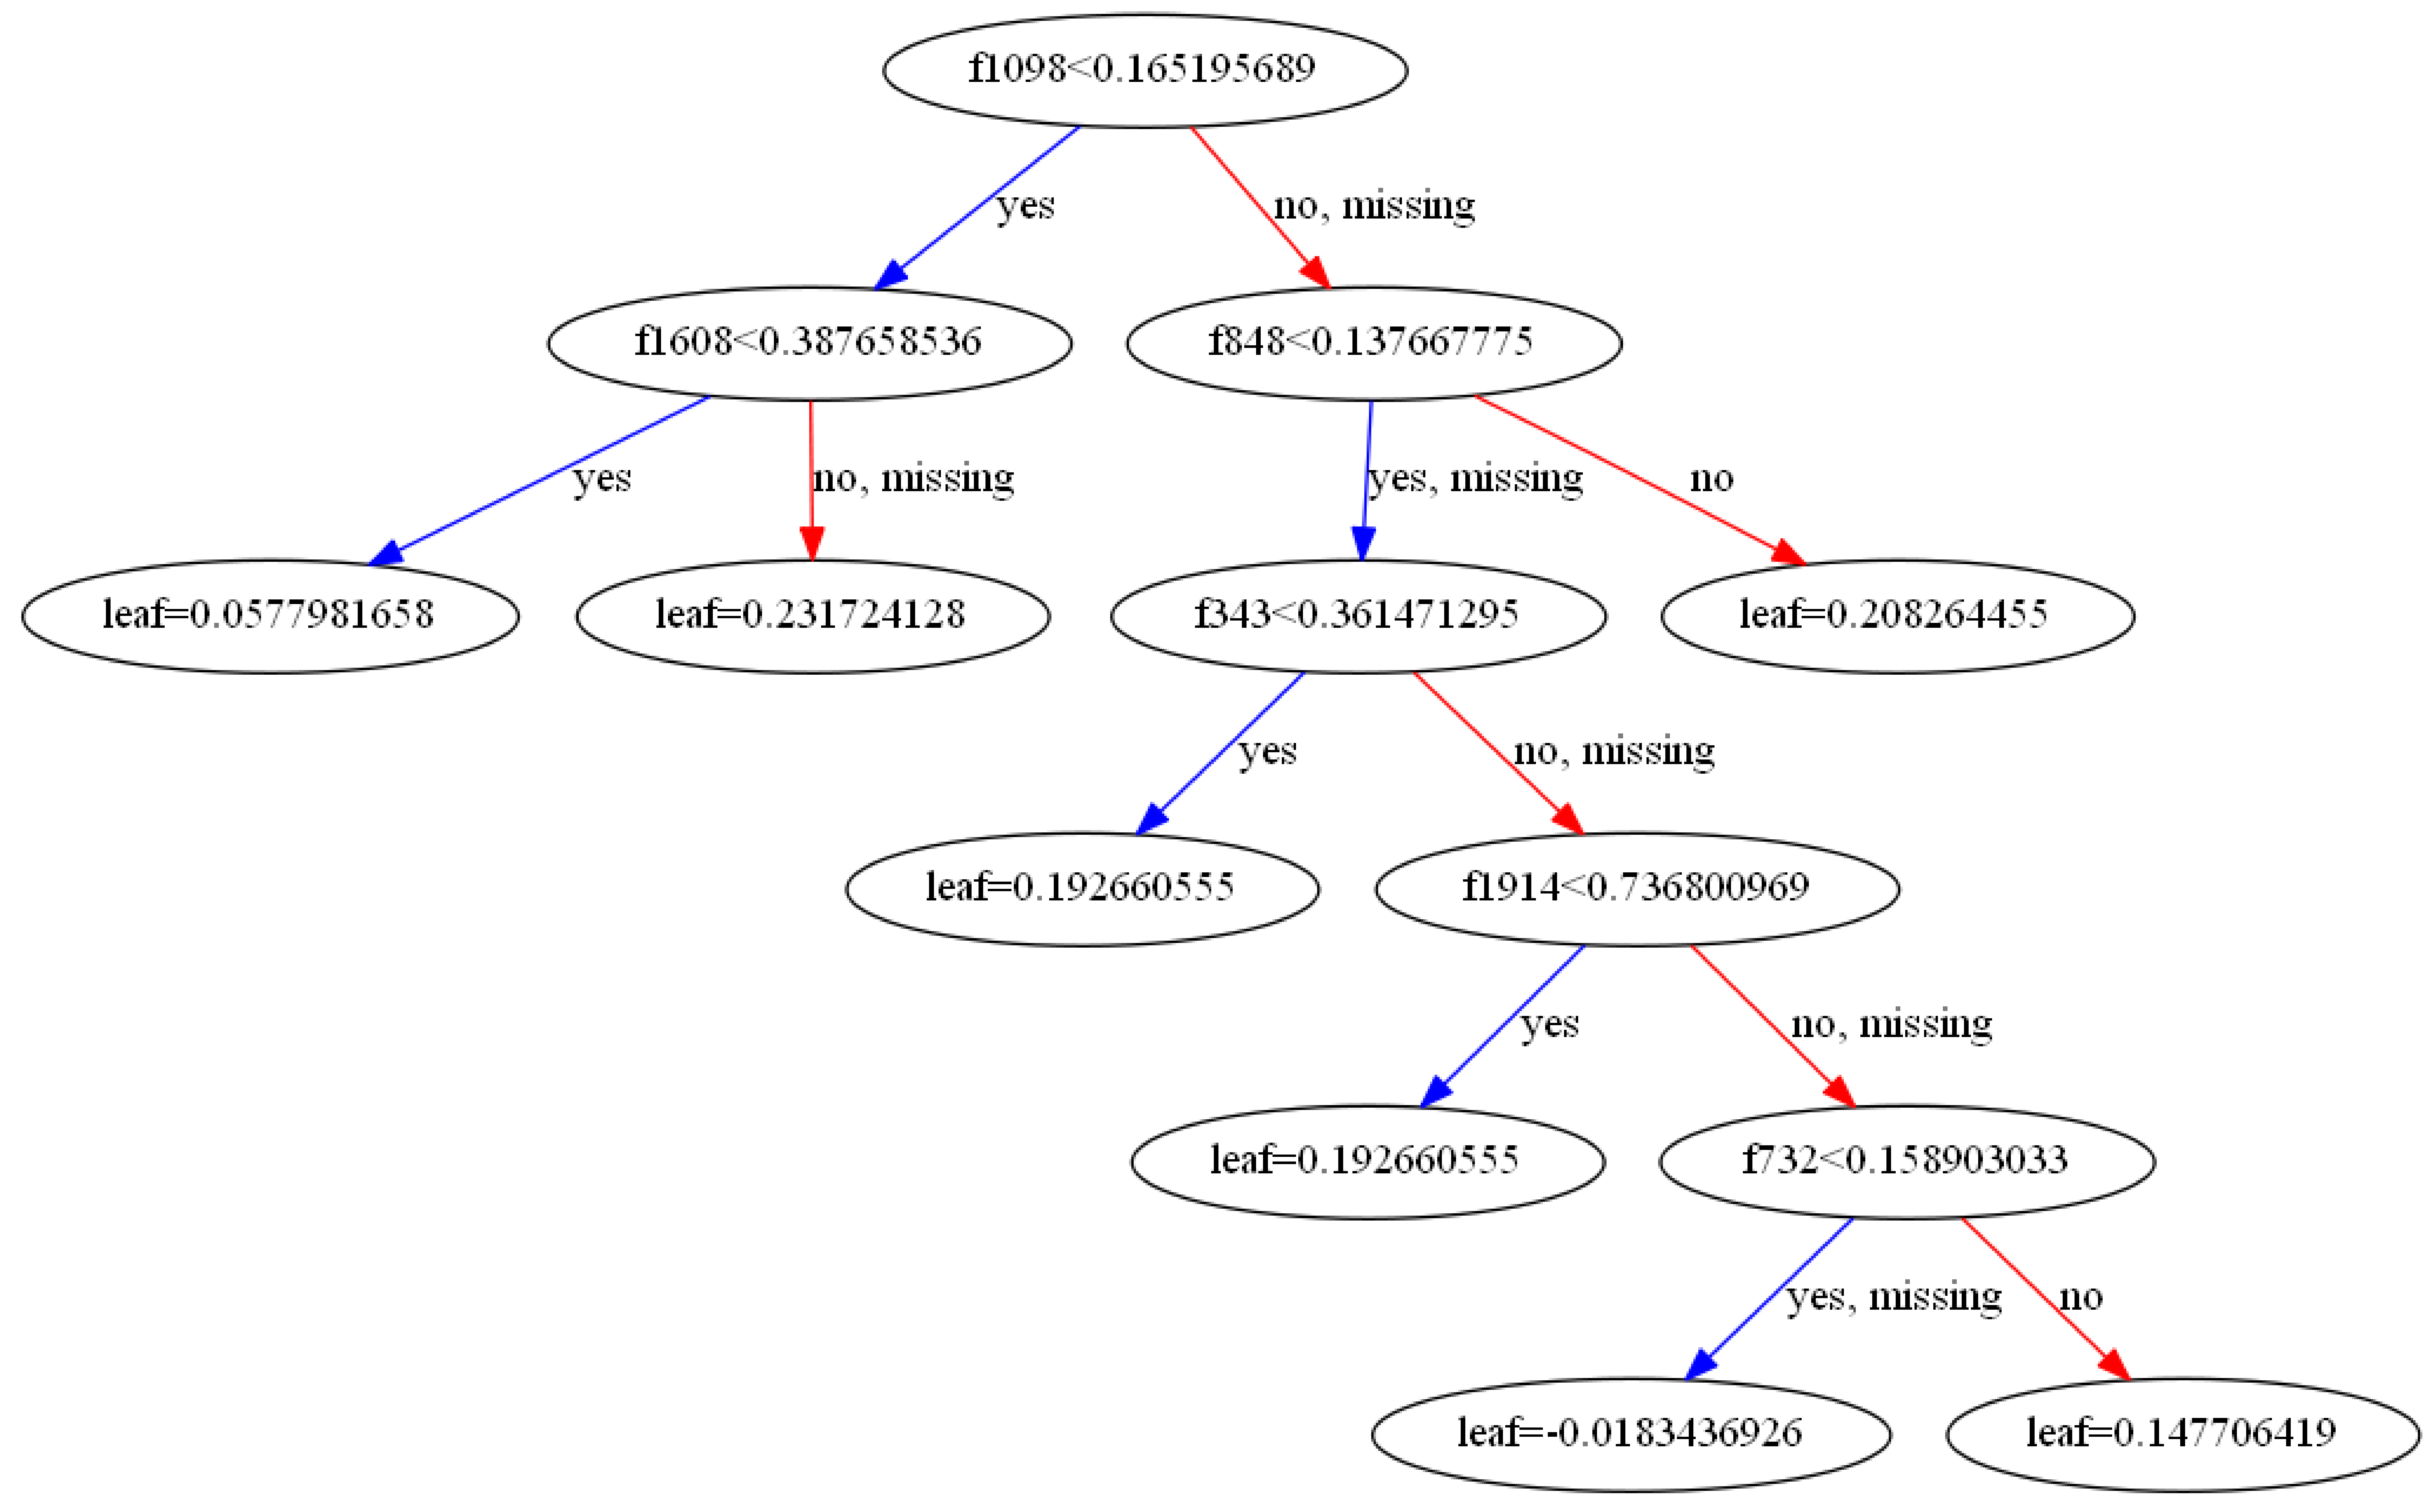

In [45]:
plot_tree(gridcv.best_estimator_)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [107]:
words_list = [
    'bad bad bad nice',
    'bad bad',
    'bad bad bad bad',
    'bad bad bad good good',
    'bad bad bad nice nice',
    'bad bad bad'
]

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

In [109]:
X = counter.fit_transform(words_list)

In [110]:
X.toarray()

array([[3, 0, 1],
       [2, 0, 0],
       [4, 0, 0],
       [3, 2, 0],
       [3, 0, 2],
       [3, 0, 0]], dtype=int64)

In [111]:
counter.get_feature_names()

['bad', 'good', 'nice']

words_list2 = [
    'Bad is so bad but nice',
    'badly bad',
    'I feel so bad bad',
    'It was bad but got much better and nice good',
    'good very nice'
]
X2= counter.fit_transform(words_list2)
X2.toarray()

counter.get_feature_names()

In [112]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)             # smooth_idf: tf+1, log 분모분자 +1

In [113]:
tfidf = transformer.fit_transform(X.toarray())
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169],
       [1.        , 0.        , 0.        ]])

In [114]:
df01 = pd.DataFrame(tfidf.A, columns=counter.get_feature_names())
df01

,bad,good,nice
0,0.819410,0.000000,0.573208
1,1.000000,0.000000,0.000000
2,1.000000,0.000000,0.000000
3,0.473303,0.880899,0.000000
4,0.581493,0.000000,0.813552
5,1.000000,0.000000,0.000000


tfidf2 = transformer.fit_transform(X2.toarray())
tfidf2.toarray()

df02 = pd.DataFrame(tfidf2.A, columns=counter.get_feature_names())
df02

Term Frequency (TF)
- 단어 빈도 tft,d는 특정 단어 t가 특정 문서 d 내에 등장하는 빈도
- 특정단어가 10번 등장하는(tf=10) 문서가 1번 등장하는(tf=1) 문서보다 더 많이 타당하 다고 볼 수 없음
- 문서의 관련도, 타당성은 term frequency와 비례하게 증가하지 않음
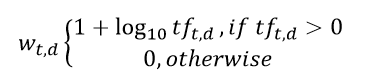

Inverse Document Frequency (IDF)
- dft는 document frequency로 단어 t가 등장한 문서의 수
- dft는 단어 t의 중요도의 역수와 같음
- 단어 t의 idf 수치 idft는 t의 단어의 중요도를 나타내는 척도
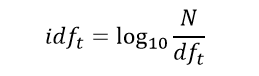

TF-IDF (Term Frequency – Inverse Document Frequency)는 TF와 IDF의 곱
- 문서군 내에서 특정 단어의 중요도를 수치화한 값
- tf-idf 값은 특정 문서 내 특정 단어의 빈도(tf)가 높아질 수록 커짐
- tf-idf 값은 문서군 내에서 단어가 희박하게 등장학 수록(idf) 커짐
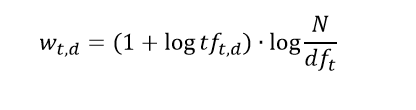

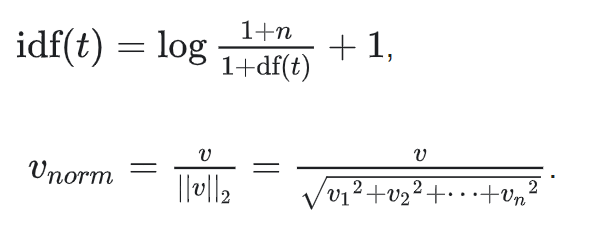

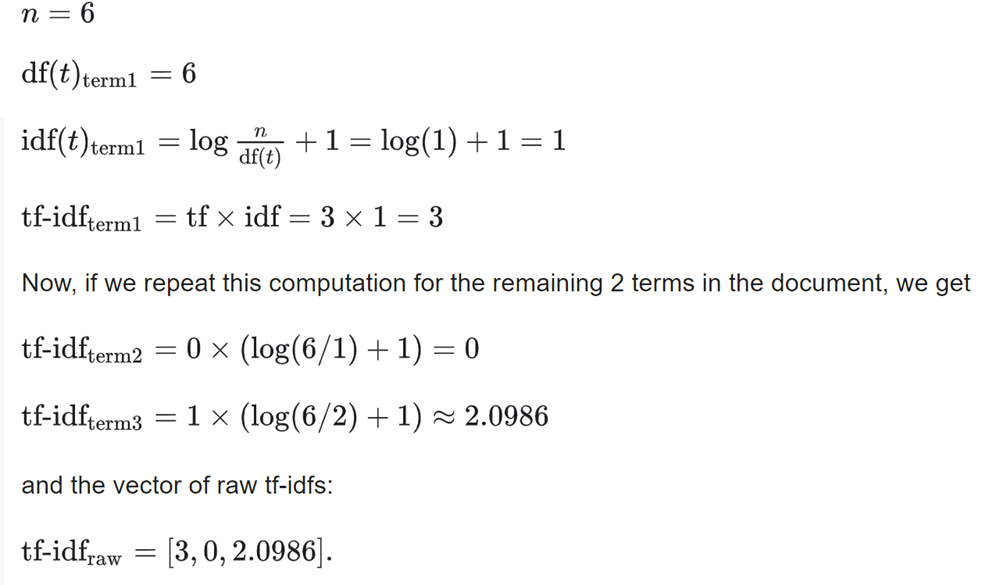

In [115]:
new_text = [
    'today is bad bad bad nice',
    'bad good good'
]
new_X = counter.transform(new_text)

In [116]:
new_X.toarray()    # 아까 학습한 데이터만 셈.

array([[3, 0, 1],
       [1, 2, 0]], dtype=int64)

In [117]:
new_tfidf = transformer.transform(new_X.toarray())
new_tfidf.toarray()                                     # tf * (학습데이터의 idf)

array([[0.81940995, 0.        , 0.57320793],
       [0.17629342, 0.98433766, 0.        ]])

In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [119]:
tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [120]:
description = df['description'].astype(str).tolist()
category = df['category'].astype(str).tolist()

In [121]:
trainset_size = int(round(len(description)*0.80))

x_train = np.array([data for data in description[0:trainset_size]])
x_test = np.array([data for data in description[trainset_size:len(description)]])

In [122]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [123]:
X_train = X_train.toarray()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
X_train.shape

(526, 3752)

In [125]:
X_train = X_train.astype('float32')

In [126]:
X_test = X_test.toarray().astype('float32')
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [127]:
num = np.unique(category, axis=0).tolist()
num

['Business',
 'Entertainment',
 'Politics',
 'ScienceAndTechnology',
 'Sports',
 'UK',
 'World']

In [128]:
category_num = [num.index(x) for x in category]
category_num

[6,
 5,
 0,
 3,
 0,
 1,
 5,
 2,
 1,
 4,
 2,
 4,
 0,
 6,
 1,
 5,
 5,
 4,
 6,
 1,
 0,
 2,
 1,
 5,
 0,
 1,
 4,
 5,
 6,
 3,
 1,
 4,
 1,
 2,
 6,
 3,
 3,
 3,
 2,
 1,
 1,
 4,
 0,
 0,
 0,
 6,
 4,
 1,
 6,
 2,
 5,
 1,
 3,
 2,
 5,
 2,
 2,
 3,
 6,
 4,
 5,
 0,
 0,
 2,
 4,
 3,
 3,
 3,
 4,
 0,
 5,
 3,
 3,
 4,
 0,
 0,
 4,
 0,
 5,
 0,
 5,
 4,
 3,
 2,
 2,
 5,
 2,
 1,
 1,
 0,
 1,
 5,
 4,
 3,
 2,
 0,
 3,
 2,
 2,
 1,
 4,
 5,
 3,
 3,
 6,
 5,
 0,
 3,
 3,
 2,
 0,
 1,
 0,
 0,
 4,
 3,
 4,
 4,
 2,
 6,
 0,
 2,
 2,
 6,
 6,
 0,
 2,
 5,
 1,
 0,
 2,
 1,
 0,
 1,
 5,
 3,
 4,
 3,
 4,
 6,
 6,
 5,
 1,
 1,
 1,
 5,
 6,
 2,
 3,
 4,
 6,
 0,
 1,
 0,
 3,
 4,
 4,
 4,
 5,
 4,
 0,
 2,
 2,
 1,
 6,
 3,
 5,
 3,
 5,
 5,
 4,
 3,
 1,
 5,
 3,
 3,
 2,
 5,
 3,
 0,
 2,
 2,
 4,
 6,
 5,
 3,
 5,
 1,
 5,
 3,
 2,
 3,
 5,
 1,
 5,
 0,
 4,
 4,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 6,
 3,
 4,
 4,
 4,
 2,
 3,
 4,
 2,
 3,
 0,
 2,
 2,
 1,
 2,
 4,
 2,
 4,
 5,
 4,
 3,
 3,
 4,
 5,
 0,
 3,
 3,
 4,
 5,
 1,
 0,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 2,
 4,
 2,
 3,
 6,
 5,


In [129]:
category_one_hot = np.eye(7)[category_num]
category_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [131]:
y_train =np.array([data for data in category_one_hot[0:trainset_size]])
y_train.shape

(526, 7)

In [132]:
y_test = np.array([data for data in category_one_hot[trainset_size:len(category_one_hot)]])

In [133]:
y_test

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
 

### CNN model 생성

In [134]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=3752))
    model.add(keras.layers.Dense(516, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(7))
    return model

In [136]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              3843072   
_________________________________________________________________
dense_4 (Dense)              (None, 516)               528900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 516)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 3619      
Total params: 4,375,591
Trainable params: 4,375,591
Non-trainable params: 0
_________________________________________________________________


In [137]:
optimizer = tf.train.AdamOptimizer(0.001)

In [138]:
for step in range(1000):
    cost=0
    accuracy=0
    
    with tf.GradientTape() as tape:
        hypothesis = model(X_train, training=True)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=y_train))
        grads = tape.gradient(cost, model.variables)
        optimizer.apply_gradients(zip(grads, model.variables))
        correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_train, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    print('step: {} Loss: {:.4f} accuracy: {:.4f}'.format(step, cost, accuracy))

step: 0 Loss: 1.9460 accuracy: 0.1312
step: 1 Loss: 1.9211 accuracy: 0.3270
step: 2 Loss: 1.8976 accuracy: 0.3992
step: 3 Loss: 1.8690 accuracy: 0.4544
step: 4 Loss: 1.8354 accuracy: 0.5646
step: 5 Loss: 1.7919 accuracy: 0.5856
step: 6 Loss: 1.7423 accuracy: 0.6635
step: 7 Loss: 1.6848 accuracy: 0.7034
step: 8 Loss: 1.6058 accuracy: 0.7452
step: 9 Loss: 1.5287 accuracy: 0.7548
step: 10 Loss: 1.4078 accuracy: 0.8308
step: 11 Loss: 1.3052 accuracy: 0.8555
step: 12 Loss: 1.1836 accuracy: 0.8802
step: 13 Loss: 1.0525 accuracy: 0.8859
step: 14 Loss: 0.8963 accuracy: 0.9278
step: 15 Loss: 0.7813 accuracy: 0.9259
step: 16 Loss: 0.6579 accuracy: 0.9544
step: 17 Loss: 0.5240 accuracy: 0.9639
step: 18 Loss: 0.4313 accuracy: 0.9753
step: 19 Loss: 0.3379 accuracy: 0.9810
step: 20 Loss: 0.2567 accuracy: 0.9848
step: 21 Loss: 0.2033 accuracy: 0.9886
step: 22 Loss: 0.1519 accuracy: 0.9905
step: 23 Loss: 0.1114 accuracy: 0.9924
step: 24 Loss: 0.0927 accuracy: 0.9924
step: 25 Loss: 0.0713 accuracy: 0.9

step: 207 Loss: 0.0077 accuracy: 0.9924
step: 208 Loss: 0.0080 accuracy: 0.9943
step: 209 Loss: 0.0050 accuracy: 0.9981
step: 210 Loss: 0.0064 accuracy: 0.9943
step: 211 Loss: 0.0070 accuracy: 0.9943
step: 212 Loss: 0.0053 accuracy: 0.9981
step: 213 Loss: 0.0095 accuracy: 0.9962
step: 214 Loss: 0.0071 accuracy: 0.9943
step: 215 Loss: 0.0072 accuracy: 0.9962
step: 216 Loss: 0.0083 accuracy: 0.9962
step: 217 Loss: 0.0061 accuracy: 0.9962
step: 218 Loss: 0.0100 accuracy: 0.9924
step: 219 Loss: 0.0095 accuracy: 0.9924
step: 220 Loss: 0.0062 accuracy: 0.9962
step: 221 Loss: 0.0094 accuracy: 0.9943
step: 222 Loss: 0.0053 accuracy: 0.9981
step: 223 Loss: 0.0042 accuracy: 0.9981
step: 224 Loss: 0.0077 accuracy: 0.9943
step: 225 Loss: 0.0069 accuracy: 0.9943
step: 226 Loss: 0.0041 accuracy: 0.9981
step: 227 Loss: 0.0107 accuracy: 0.9943
step: 228 Loss: 0.0048 accuracy: 0.9981
step: 229 Loss: 0.0063 accuracy: 0.9962
step: 230 Loss: 0.0086 accuracy: 0.9943
step: 231 Loss: 0.0088 accuracy: 0.9943


step: 411 Loss: 0.0061 accuracy: 0.9943
step: 412 Loss: 0.0061 accuracy: 0.9943
step: 413 Loss: 0.0077 accuracy: 0.9962
step: 414 Loss: 0.0097 accuracy: 0.9924
step: 415 Loss: 0.0083 accuracy: 0.9924
step: 416 Loss: 0.0060 accuracy: 0.9981
step: 417 Loss: 0.0065 accuracy: 0.9962
step: 418 Loss: 0.0049 accuracy: 0.9962
step: 419 Loss: 0.0068 accuracy: 0.9962
step: 420 Loss: 0.0038 accuracy: 0.9981
step: 421 Loss: 0.0055 accuracy: 0.9981
step: 422 Loss: 0.0053 accuracy: 0.9962
step: 423 Loss: 0.0078 accuracy: 0.9943
step: 424 Loss: 0.0058 accuracy: 0.9981
step: 425 Loss: 0.0078 accuracy: 0.9943
step: 426 Loss: 0.0068 accuracy: 0.9924
step: 427 Loss: 0.0066 accuracy: 0.9924
step: 428 Loss: 0.0062 accuracy: 0.9981
step: 429 Loss: 0.0070 accuracy: 0.9943
step: 430 Loss: 0.0050 accuracy: 0.9981
step: 431 Loss: 0.0066 accuracy: 0.9924
step: 432 Loss: 0.0057 accuracy: 0.9943
step: 433 Loss: 0.0044 accuracy: 0.9981
step: 434 Loss: 0.0051 accuracy: 0.9981
step: 435 Loss: 0.0050 accuracy: 0.9962


step: 616 Loss: 0.0058 accuracy: 0.9962
step: 617 Loss: 0.0061 accuracy: 0.9943
step: 618 Loss: 0.0070 accuracy: 0.9943
step: 619 Loss: 0.0086 accuracy: 0.9924
step: 620 Loss: 0.0052 accuracy: 0.9962
step: 621 Loss: 0.0050 accuracy: 0.9981
step: 622 Loss: 0.0056 accuracy: 0.9962
step: 623 Loss: 0.0073 accuracy: 0.9962
step: 624 Loss: 0.0074 accuracy: 0.9962
step: 625 Loss: 0.0079 accuracy: 0.9943
step: 626 Loss: 0.0054 accuracy: 0.9962
step: 627 Loss: 0.0023 accuracy: 1.0000
step: 628 Loss: 0.0055 accuracy: 0.9981
step: 629 Loss: 0.0059 accuracy: 0.9962
step: 630 Loss: 0.0073 accuracy: 0.9943
step: 631 Loss: 0.0070 accuracy: 0.9962
step: 632 Loss: 0.0075 accuracy: 0.9943
step: 633 Loss: 0.0058 accuracy: 0.9943
step: 634 Loss: 0.0069 accuracy: 0.9962
step: 635 Loss: 0.0084 accuracy: 0.9943
step: 636 Loss: 0.0063 accuracy: 0.9962
step: 637 Loss: 0.0056 accuracy: 0.9962
step: 638 Loss: 0.0086 accuracy: 0.9943
step: 639 Loss: 0.0063 accuracy: 0.9943
step: 640 Loss: 0.0069 accuracy: 0.9943


step: 821 Loss: 0.0063 accuracy: 0.9943
step: 822 Loss: 0.0046 accuracy: 0.9981
step: 823 Loss: 0.0072 accuracy: 0.9962
step: 824 Loss: 0.0064 accuracy: 0.9943
step: 825 Loss: 0.0031 accuracy: 1.0000
step: 826 Loss: 0.0074 accuracy: 0.9943
step: 827 Loss: 0.0059 accuracy: 0.9943
step: 828 Loss: 0.0066 accuracy: 0.9943
step: 829 Loss: 0.0055 accuracy: 0.9981
step: 830 Loss: 0.0061 accuracy: 0.9962
step: 831 Loss: 0.0071 accuracy: 0.9962
step: 832 Loss: 0.0073 accuracy: 0.9943
step: 833 Loss: 0.0058 accuracy: 0.9962
step: 834 Loss: 0.0055 accuracy: 0.9981
step: 835 Loss: 0.0064 accuracy: 0.9943
step: 836 Loss: 0.0053 accuracy: 0.9962
step: 837 Loss: 0.0048 accuracy: 0.9962
step: 838 Loss: 0.0060 accuracy: 0.9962
step: 839 Loss: 0.0052 accuracy: 0.9981
step: 840 Loss: 0.0044 accuracy: 0.9981
step: 841 Loss: 0.0064 accuracy: 0.9962
step: 842 Loss: 0.0057 accuracy: 0.9962
step: 843 Loss: 0.0046 accuracy: 0.9981
step: 844 Loss: 0.0048 accuracy: 0.9962
step: 845 Loss: 0.0052 accuracy: 0.9981


In [140]:
pred = model.predict(X_test)
pred

array([[-2.19841933e+00, -5.49251270e+00,  2.43189645e+00,
        -3.05818510e+00, -4.31534648e-01,  4.10522318e+00,
        -2.62024736e+00],
       [-2.33576202e+00, -3.64271808e+00, -3.91517782e+00,
        -3.63376093e+00, -5.68634367e+00,  1.06807404e+01,
         8.35839689e-01],
       [ 1.10919676e+01, -2.39010692e+00, -4.77372026e+00,
        -1.34475219e+00, -3.13919425e+00, -2.54522991e+00,
        -7.37974882e-01],
       [-5.58815813e+00,  4.37388945e+00, -3.44592810e+00,
        -2.55200195e+00, -2.91297984e+00,  6.23102522e+00,
        -2.95274615e+00],
       [-2.76600552e+00, -3.97914004e+00,  1.41014469e+00,
         9.62977529e-01,  1.20608377e+00, -5.06893456e-01,
        -3.79410291e+00],
       [ 1.20305181e+00, -4.50291455e-01,  8.84160519e-01,
         5.35895634e+00, -6.46364594e+00, -3.84054923e+00,
        -3.97984982e+00],
       [-5.30717516e+00,  5.89156091e-01, -1.20734239e+00,
        -1.57967675e+00, -3.96562409e+00, -2.47265029e+00,
         7.4682464

In [141]:
predict = tf.argmax(pred, 1)
predict

<tf.Tensor: id=140372, shape=(132,), dtype=int64, numpy=
array([5, 5, 0, 5, 2, 3, 6, 4, 1, 3, 4, 0, 4, 2, 2, 5, 0, 0, 5, 3, 5, 3,
       4, 5, 6, 2, 3, 4, 1, 3, 4, 0, 5, 3, 4, 2, 2, 5, 6, 3, 3, 3, 2, 5,
       0, 0, 3, 3, 5, 0, 0, 4, 4, 0, 1, 3, 0, 1, 2, 4, 4, 6, 3, 3, 6, 1,
       5, 2, 0, 6, 1, 5, 5, 4, 1, 5, 2, 1, 0, 2, 3, 3, 2, 2, 5, 6, 1, 5,
       4, 0, 1, 1, 3, 2, 5, 5, 4, 4, 4, 0, 4, 3, 3, 4, 5, 6, 6, 3, 4, 4,
       0, 1, 5, 5, 1, 0, 3, 5, 5, 4, 1, 5, 4, 2, 2, 5, 5, 5, 0, 0, 0, 3],
      dtype=int64)>

In [142]:
y = tf.argmax(y_test, 1)
y

<tf.Tensor: id=140376, shape=(132,), dtype=int64, numpy=
array([6, 5, 0, 6, 4, 3, 6, 4, 1, 3, 4, 6, 4, 2, 2, 6, 0, 0, 3, 2, 5, 3,
       0, 5, 6, 6, 3, 4, 0, 1, 4, 0, 5, 3, 4, 3, 2, 6, 5, 3, 6, 1, 6, 5,
       3, 6, 6, 3, 5, 0, 6, 4, 4, 1, 1, 6, 0, 5, 2, 4, 4, 5, 0, 3, 6, 2,
       0, 2, 0, 5, 6, 2, 5, 4, 1, 2, 0, 4, 3, 0, 2, 5, 2, 3, 5, 6, 1, 5,
       4, 1, 1, 1, 1, 2, 6, 5, 4, 1, 4, 0, 4, 3, 5, 4, 1, 5, 2, 3, 4, 4,
       0, 1, 6, 6, 4, 0, 3, 3, 5, 4, 0, 5, 4, 0, 2, 5, 6, 5, 0, 0, 0, 6],
      dtype=int64)>

In [143]:
print('confusion matrix:\n')
print(confusion_matrix(y, predict))
print('\n classification report:\n')
print(classification_report(y, predict))

confusion matrix:

[[13  2  3  1  1  1  0]
 [ 2  7  0  3  1  1  0]
 [ 0  1  8  2  0  2  1]
 [ 2  0  2 11  0  2  0]
 [ 0  2  1  0 20  0  0]
 [ 0  1  0  2  0 14  4]
 [ 3  1  2  4  0  8  4]]

 classification report:

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.50      0.50      0.50        14
           2       0.50      0.57      0.53        14
           3       0.48      0.65      0.55        17
           4       0.91      0.87      0.89        23
           5       0.50      0.67      0.57        21
           6       0.44      0.18      0.26        22

    accuracy                           0.58       132
   macro avg       0.57      0.58      0.56       132
weighted avg       0.58      0.58      0.57       132

